In [3]:
import pandas as pd
import seaborn as sns
import random

In [6]:
Age = ['<21', '21-24',  '24-27',  '27-30',  '30-33',  '33-36',  '36-39',  '39-42',  '42-45',  '45-48',  '48-51',  '51-54',  '54-57',  '57-60',  '>60']
total_loans = [random.randint(10, 9000) for i in range(15)]
bad_loans = [random.randint(10, 200) for i in range(15)]
good_loans = [total_loans[i]-bad_loans[i] for i in range(15)]

[3093, 8541, 8761, 8671, 2896, 2263, 2398, 8436, 8173, 3806, 2778, 7889, 6747, 4497, 1101]


In [10]:
bad_percentage = [((bad_loans[i]/total_loans[i])*100) for i in range(15)]
good_percentage = [((good_loans[i]/total_loans[i])*100) for i in range(15)]

In [12]:
data = {
    'Age': Age,
    'Total Loans': total_loans,
    'Bad Loans': bad_loans,
    'Good Loans': good_loans,
    'Bad Percentage': bad_percentage,
    'Good Percentage': good_percentage
}
df = pd.DataFrame(data)
print(data)

{'Age': ['<21', '21-24', '24-27', '27-30', '30-33', '33-36', '36-39', '39-42', '42-45', '45-48', '48-51', '51-54', '54-57', '57-60', '>60'], 'Total Loans': [3132, 8620, 8833, 8682, 3046, 2295, 2442, 8548, 8355, 3826, 2867, 8077, 6788, 4610, 1147], 'Bad Loans': [39, 79, 72, 11, 150, 32, 44, 112, 182, 20, 89, 188, 41, 113, 46], 'Good Loans': [3093, 8541, 8761, 8671, 2896, 2263, 2398, 8436, 8173, 3806, 2778, 7889, 6747, 4497, 1101], 'Bad Percentage': [1.2452107279693485, 0.9164733178654292, 0.8151250990603419, 0.12669891730016125, 4.9244911359159556, 1.3943355119825707, 1.8018018018018018, 1.3102480112306973, 2.178336325553561, 0.5227391531625719, 3.104290198814091, 2.3275968800297138, 0.6040070713022981, 2.4511930585683297, 4.0104620749782045], 'Good Percentage': [98.75478927203065, 99.08352668213458, 99.18487490093966, 99.87330108269984, 95.07550886408404, 98.60566448801742, 98.1981981981982, 98.6897519887693, 97.82166367444644, 99.47726084683742, 96.89570980118592, 97.67240311997028, 9

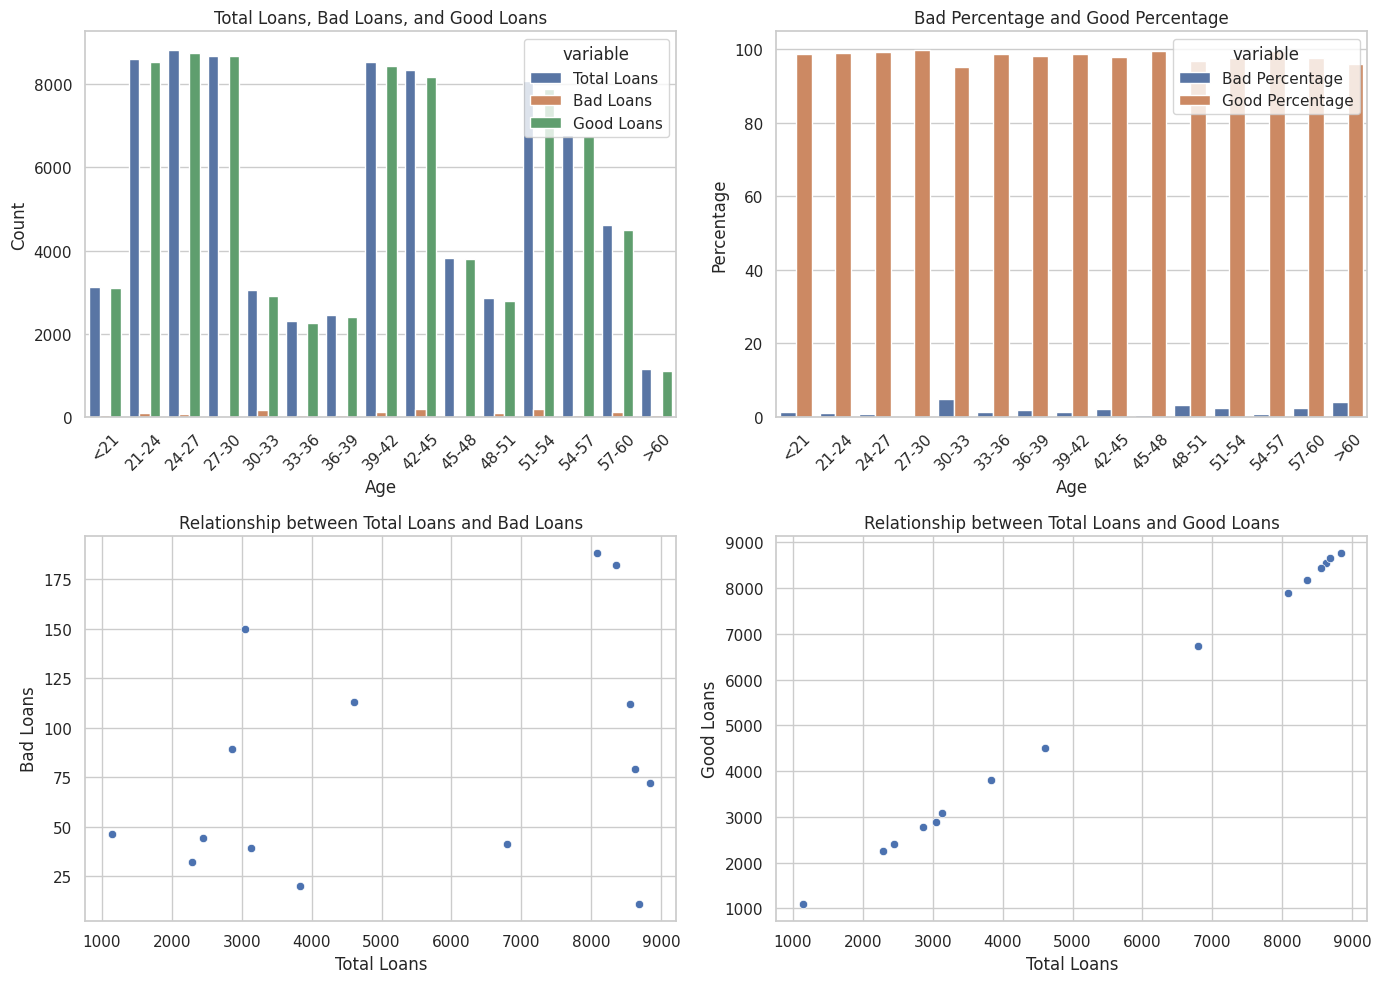

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(ax=axes[0, 0], x='Age', y='value', hue='variable', data=pd.melt(df, id_vars='Age', value_vars=['Total Loans', 'Bad Loans', 'Good Loans']))
axes[0, 0].set_title('Total Loans, Bad Loans, and Good Loans')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[0, 1], x='Age', y='value', hue='variable', data=pd.melt(df, id_vars='Age', value_vars=['Bad Percentage', 'Good Percentage']))
axes[0, 1].set_title('Bad Percentage and Good Percentage')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.scatterplot(ax=axes[1, 0], x='Total Loans', y='Bad Loans', data=df)
axes[1, 0].set_title('Relationship between Total Loans and Bad Loans')
axes[1, 0].set_xlabel('Total Loans')
axes[1, 0].set_ylabel('Bad Loans')

sns.scatterplot(ax=axes[1, 1], x='Total Loans', y='Good Loans', data=df)
axes[1, 1].set_title('Relationship between Total Loans and Good Loans')
axes[1, 1].set_xlabel('Total Loans')
axes[1, 1].set_ylabel('Good Loans')

plt.tight_layout()

plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['Total Loans']]
y = df['Bad Loans']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

R-squared score: 0.145129695587369


##The model can be saved and used for further analysis and prediction.
